# Exploration of Healthcare Accessibility in LA County 

<b> Keven Michel </b>

<b> 17 March 2021 </b>


<hr> 

<b> Introduction </b>

This notebook involves only part of the final project that focuses on the healtcare accessibility in the Los Angeles County. The other part involves the data analyzed by my partner for this project. For this notebook, I chose to focus on racial data, health and mental health program data and data surrounding the number of medical facilities within the county. These visualizations allow us to ask questions whether there exists a form of inequity in healthcare and whether income and race play in a role for that inequity to exist. Overall, this notebook focuses on only half of our research findings, with a strong look towards health programs provided by the County. 

Final Story Map Link:
https://storymaps.arcgis.com/stories/9f5648663c374ba5a62c0f470fc87bd7

<hr>

In [1]:
# import all neccessary libraries for the project

import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

import seaborn as sns 
import numpy as np

from pointpats import centrography


/opt/conda/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:

cens = gpd.read_file("datasets/censustracts1.geojson") # pulling census tract data 

php = gpd.read_file("datasets/HEC2.geojson") # pulling health and mental health program data 

hmc = gpd.read_file("datasets/HMC2.geojson") # pulling medical center data 


In [3]:
cens = cens.drop([0])

In [4]:
trac = ['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry' ]

In [5]:
cens = cens[trac]

In [6]:
# rename the columns 

cens.columns = [ 
'geoid',
 'Zipcode',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry']

In [7]:
# convert columns to percentages 

cens["Percent Non Hispanic"] = cens["Non Hispanic"]/cens["Total"]*100
cens['Percent Hispanic'] = cens['Hispanic']/cens['Total']*100
cens['Percent Non Hispanic White'] = cens['Non Hispanic White']/cens['Total']*100
cens['Percent Non Hispanic Black'] = cens['Non Hispanic Black']/cens['Total']*100
cens['Percent Non Hispanic American Indian and Alaska Native'] = cens['Non Hispanic American Indian and Alaska Native']/cens['Total']*100
cens['Percent Non Hispanic Asian'] = cens['Non Hispanic Asian']/cens['Total']*100
cens['Percent Non Hispanic Native Hawaiian and Other Pacific Islander'] = cens['Non Hispanic Native Hawaiian and Other Pacific Islander']/cens['Total']*100
cens['Percent Non Hispanic Some other race'] = cens['Non Hispanic Some other race']/cens['Total']*100
cens['Percent Non Hispanic Two or more races'] = cens['Non Hispanic Two or more races']/cens['Total']*100


## Percent Hispanic v. Percent Non Hispanic White 

Text(0.5, 1.0, 'Percent Non Hispanic White')

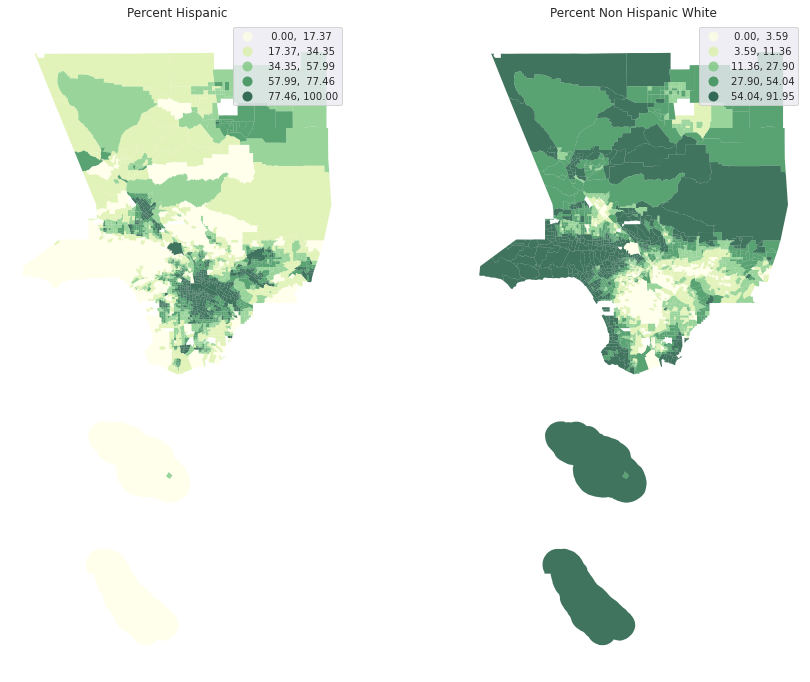

In [40]:
fig, axs = plt.subplots(1,2, figsize= (15,12))

ax1, ax2 = axs 

cens.plot(column = "Percent Hispanic",
           cmap = "YlGn",
           scheme = "quantiles",
           k = 5,
           edgecolor = "white",
           linewidth = 0,
           alpha = 0.75,
           ax = ax1,
           legend = True,
          )
ax1.axis("off")
ax1.set_title("Percent Hispanic")

cens.plot(column = "Percent Non Hispanic White",
           cmap = "YlGn",
           scheme = "quantiles",
           k=5,
           edgecolor = "white",
           linewidth = 0,
           alpha = 0.75,
           ax = ax2, 
           legend = True)
ax2.axis("off")
ax2.set_title("Percent Non Hispanic White")

##### Figure 1 

<b> Analysis </b> 

These two maps represent the racial profiles of Hispanics and Non-Hispanic Whites. Using this, along with our data on income and maps with health clinics, gives us a better picture of "who" exactly is living in these communities and "what" services are being provided to them. 

<hr>

In [10]:
# convert the geometries of dataset that the Seaborn plot can read the 

php["x"] = php.geometry.x
php["y"] = php.geometry.y

hmc["x"] = hmc.geometry.x
hmc["y"] = hmc.geometry.y

mean_center = centrography.mean_center(php[['x','y']])
med_center = centrography.euclidean_median(php[['x','y']])

## Mean/Median information on Public Health Programs

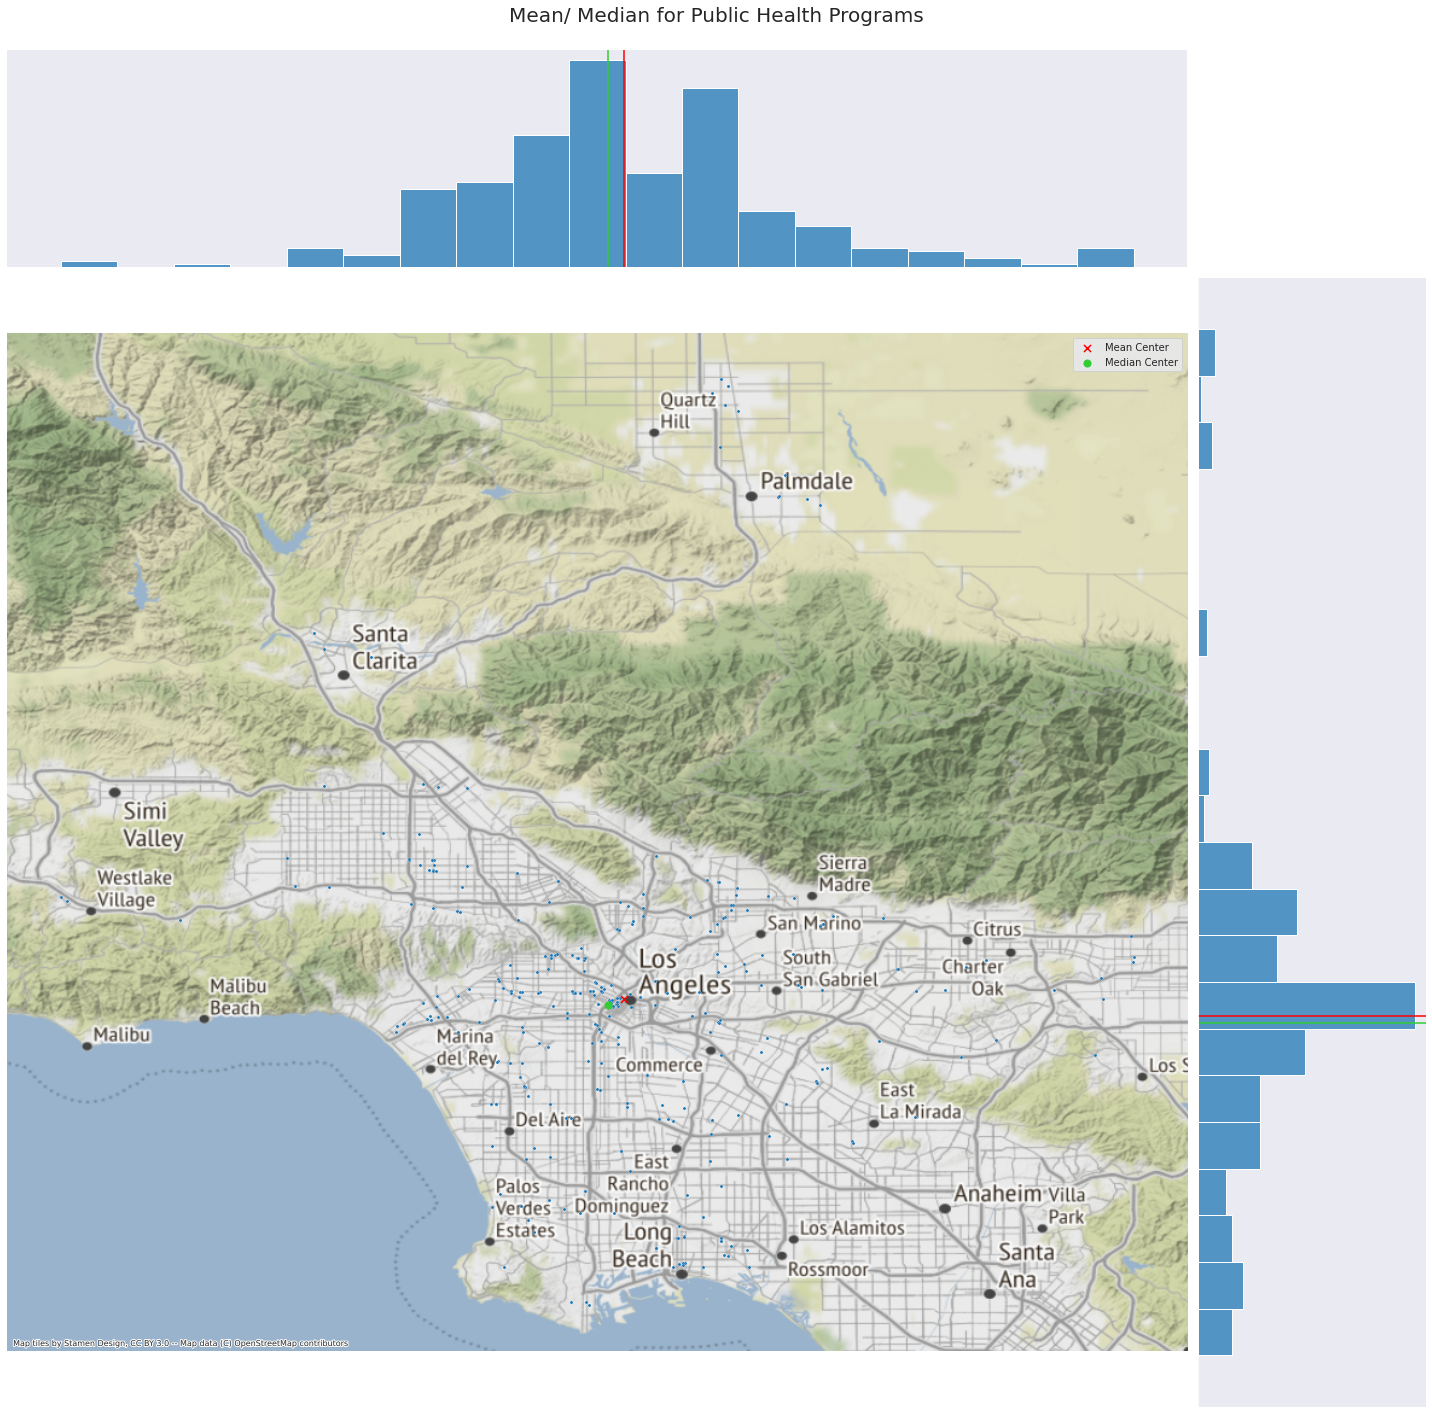

In [41]:
k = sns.jointplot(data = php, 
                  x = "x", 
                  y = "y", 
                  s = 10, 
                  height = 20)

k.ax_joint.scatter(
    *mean_center, color='red', marker='x', s=50, label='Mean Center'
)
k.ax_marg_x.axvline(mean_center[0], color='red')
k.ax_marg_y.axhline(mean_center[1], color='red')

k.ax_joint.scatter(
    *med_center, color='limegreen', marker='o', s=50, label='Median Center'
)
k.ax_marg_x.axvline(med_center[0], color='limegreen')
k.ax_marg_y.axhline(med_center[1], color='limegreen')

k.ax_joint.legend()

k.ax_joint.set_axis_off()

ctx.add_basemap(k.ax_joint,
                crs='epsg:4326')


k.fig.suptitle("Mean/ Median for Public Health Programs", size = 20)
k.fig.tight_layout()
k.fig.subplots_adjust(top=0.95) # Reduce plot to make room 

plt.show()



##### Figure 2 

<b> Analysis </b> 

The mean/median distribution shown here describes where the center of most public health programs are located within the city. The average distribution shows us the center of these locations while also allowing us to see the easiest way to get to some of these programs while travelling. 

<hr>

## Health and Mental Health Programs in LA County 

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


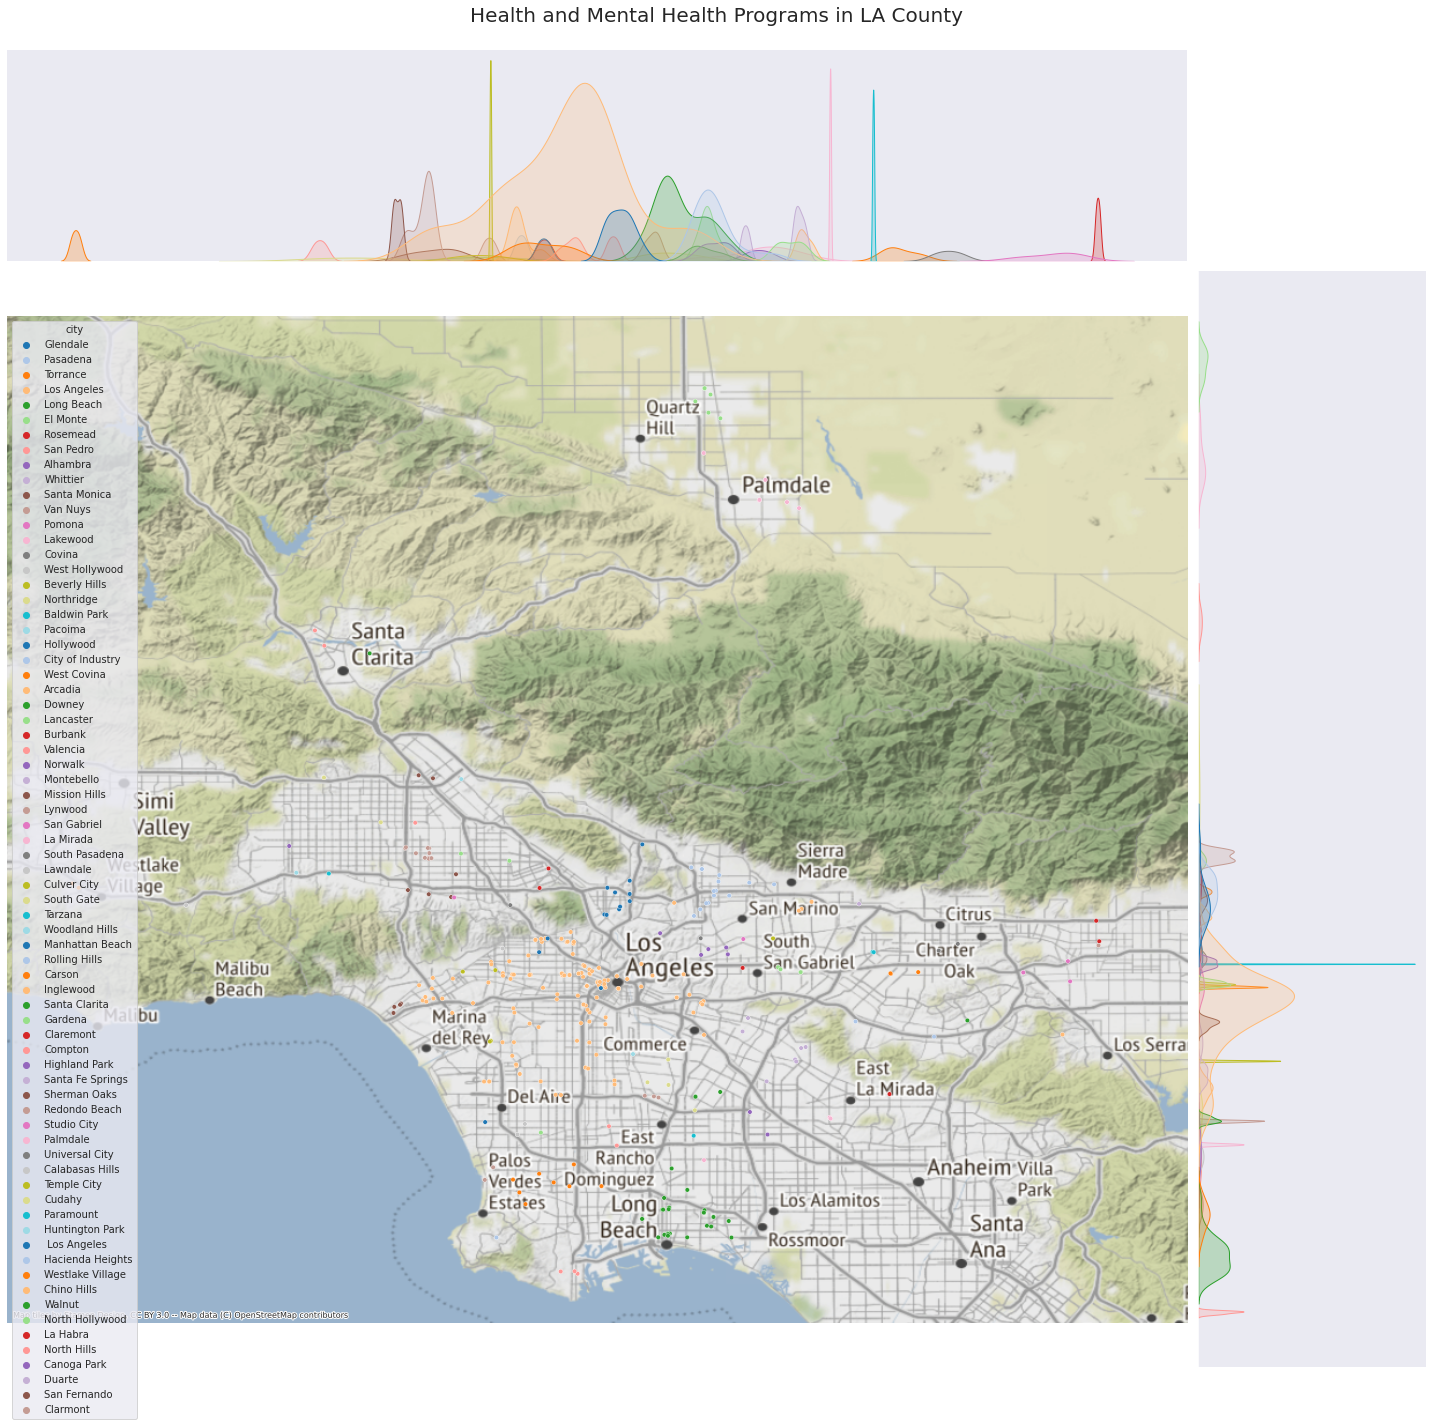

In [30]:
k=sns.jointplot(data=php,
            x='x', 
            y='y',
            hue='city',
            palette='tab20',
            s=20,
            height = 20,
           )
k.ax_joint.set_axis_off()
ctx.add_basemap(k.ax_joint,
                crs='epsg:4326')

k.fig.suptitle("Health and Mental Health Programs in LA County", size = 20)
k.fig.tight_layout()
k.fig.subplots_adjust(top=0.95) # Reduce plot to make room 

##### Figure 3 

<b> Analysis </b>

The different colors on this map represent the cities in which a public health program is located while the the graphs on the side represent the concentration of those programs within the city. The larger the color, the more programs are located within a distance in that city. This helps us visualize which city has the most pubic health programs to offer compared to neighboring cities. 

<hr>

## Line of Regression on Health Programs 

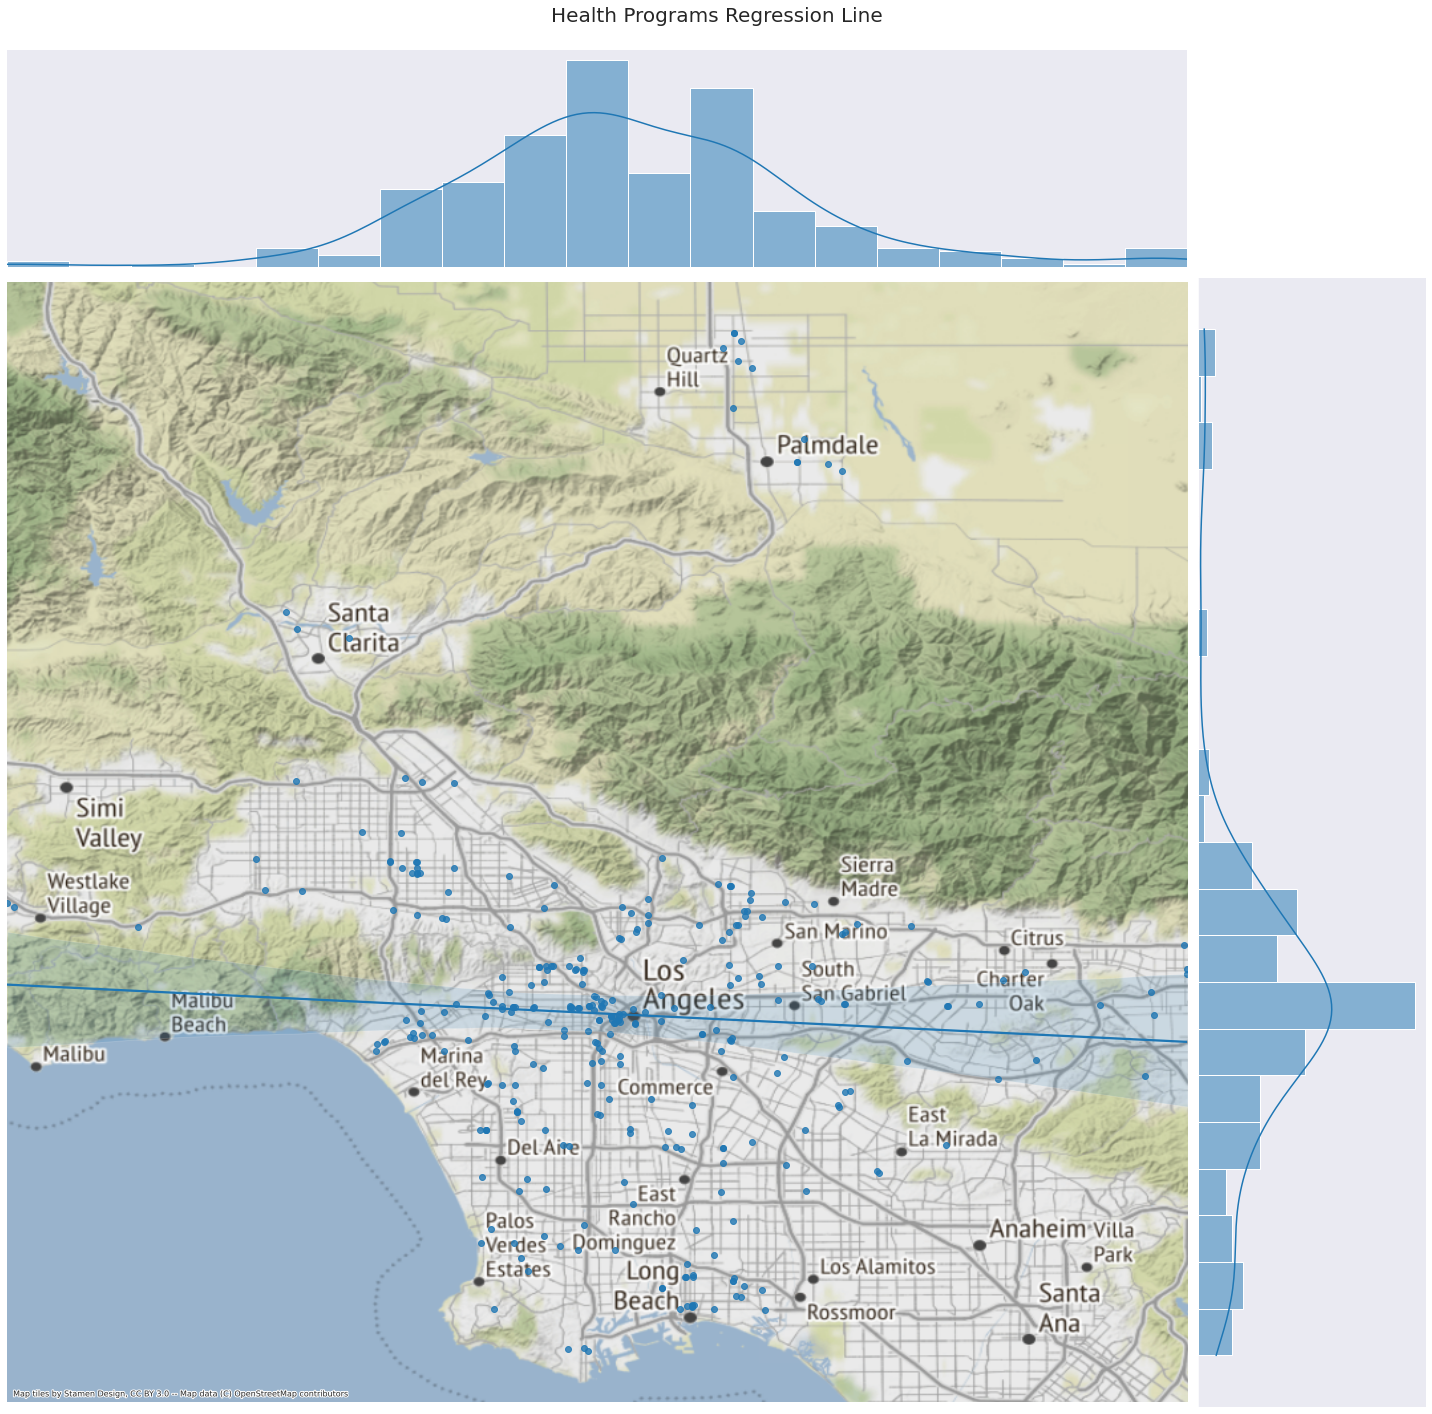

In [31]:
sns.set_style("dark")


g = sns.jointplot( data = php, x= "longitude", y = "latitude", kind = "reg", height = 20 )

g.ax_joint.set_axis_off()
ctx.add_basemap(g.ax_joint,
                crs='epsg:4326')

g.fig.suptitle("Health Programs Regression Line", size = 20)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.95) # Reduce plot to make room 

##### Figure 4 

<b> Analysis </b> 

A line of regression informs us the relationship between two variables, in this case the number of Health programs located at the latitude of the County compared to its longitude. For us, this allows us to view new insights on the distriubtion of health programs on a linear scale. By doing this, we are able to understand that there exists an equal distribution of health programs that cuts through the center of LA County. 

<hr>

## Concentration of Medical Center Facilities 

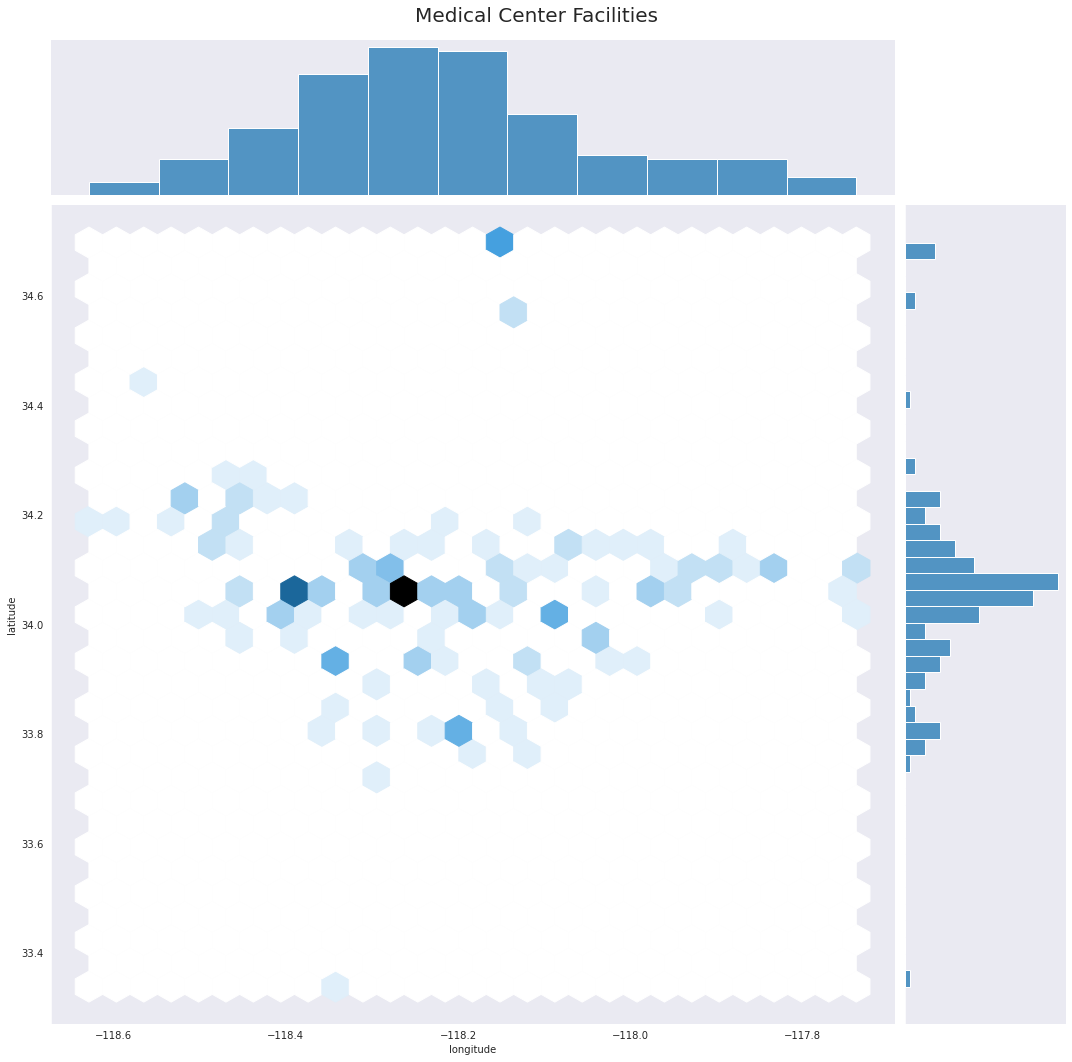

In [32]:
f =sns.jointplot(data= hmc, x= "longitude", y = "latitude", height = 15, kind = "hex")

f.fig.suptitle("Medical Center Facilities", size = 20)
f.fig.tight_layout()
f.fig.subplots_adjust(top=0.95) # Reduce plot to make room 

##### Figure 5 

<b> Analysis </b>

The hex graph explains the concentration of Medical facilities within the County, with darker shades representing where most facilities are highly cocncentrated and lighter shades representing where there is less. This illustration gives a much simpler explanation using hexagons rather than a point plot map which is primarily used to demonstrate location.

<hr>

## Types of Medical Facilities in LA County

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


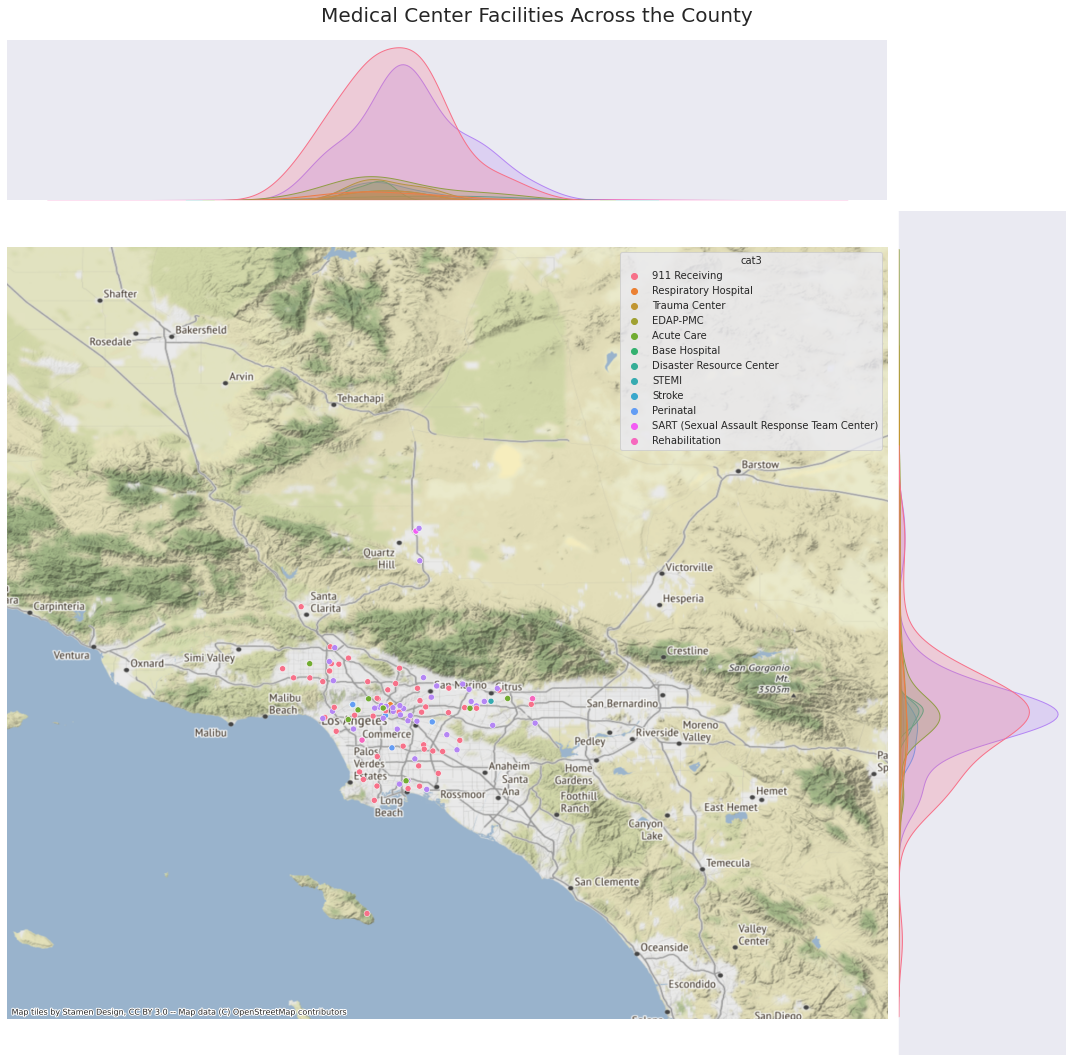

In [33]:
p = sns.jointplot(data= hmc, x= "longitude", y = "latitude", height = 15, hue = "cat3")
p.ax_joint.set_axis_off()
ctx.add_basemap(p.ax_joint,
                crs='epsg:4326')

p.fig.suptitle("Medical Center Facilities Across the County", size = 20)
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95) # Reduce plot to make room 

##### Figure 6 

<b> Analysis </b> 

The data provided allows us to see what type of services are given at hospitals and medical centers in the LA County. This is important to see how close a certain service is compared to other areas within the county. It also allows us to see where services are lacking for certain communities. For example, the number of rehabilitation centers in the county is very low and you can only find some in certain cities, as opposed of having more facilities in areas with higher need.

<hr>

## Conclusion 

After analyzing all these visualizations using the data provided, we were able to identify that there exist a minor correlation between a persons income, race and their access to health care services. However, we also have data that shows us a rise in certain populations accessing more health care services after the Affordable Healthcare Act was signed by the Obama Administration in 2010. And using regression data, mean/median visualization, we can observe how even in higher income communities, there exist some areas with less medical services provided. Altough not a final conclusion, the data and visualizations develop provide us with more insight and continue discussions on provising more access to underrepresented communities with more and better medical services. 

<hr>

<b> Contributors </b>

This notebook is only part of the final project. It was created by Keven Michel on March 17 2021.

<hr>